# Impact of hate groups on hate crimes in the USA

[Summary](https://github.com/gemmaaa/capstone_projects/blob/master/Hate_in_USA_Summary.ipynb) / [Data import and cleaning](https://github.com/gemmaaa/capstone_projects/blob/master/Hate_in_USA_1.Data_import.ipynb) / ***Data analysis*** / [Modeling](https://github.com/gemmaaa/capstone_projects/blob/master/Hate_in_USA_3.Modeling.ipynb)

## 2. Data Analysis

* Total number of hate groups
    * overall
    * by year
    * in each state
* Number and size of different hate types
	* by year
* Number of states with each hate type
	* variance
	* by year
* Types of crimes 
	* in area with 5 largest hate groups
	* in area of each hate type
* Hate crimes by bias motivation per city
	* Distribution
	* Chronological average
	* Chronological totals
* Number of hate crimes in cities with hate groups vs number without hate groups


### Import statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


Importing the files created in [Data import and cleaning](https://github.com/gemmaaa/capstone_projects/blob/master/Hate_in_USA_1.Data_import.ipynb):

In [2]:
hatemaps = pd.read_csv('/Users/gemma/Documents/data science/fc-hatemaps.csv')
crimes_by_state = pd.read_csv('/Users/gemma/Documents/data science/fc-crimes_by_state.csv')

state_totals = pd.read_csv('/Users/gemma/Documents/data science/fc-hate-state_totals.csv')
by_city_only = pd.read_csv('/Users/gemma/Documents/data science/fc-hate-by_city.csv')

In [3]:
state_totals.head()

,Year,State,REA,Religion,Disability,Gender,Gender Identity,Sexual orientation,Total offenses,Aggravated assault,...,Rape (revised),Other Crimes c persons,Arson,Burglary,Destruction damage vandalism,Larceny theft,Motor vehicle theft,Robbery,Other Crimes c property,Crimes c society
0,2006,AL,1.0,0.0,0.0,NaN,NaN,0.0,1,0,...,NaN,0,0,0,0,0,0,0,0,0
1,2006,AK,4.0,0.0,0.0,NaN,NaN,2.0,11,3,...,NaN,0,0,0,1,0,0,0,0,0
2,2006,AZ,90.0,30.0,1.0,NaN,NaN,28.0,215,23,...,NaN,0,0,2,54,0,1,0,0,0
3,2006,AR,97.0,3.0,2.0,NaN,NaN,11.0,133,16,...,NaN,1,0,8,16,23,0,1,4,0
4,2006,CA,844.0,204.0,3.0,NaN,NaN,246.0,1604,372,...,NaN,0,10,21,533,8,1,34,0,0


Let's get the number of hate groups in each hate category per state.

In [4]:
# making a table with counts to merge into the hatemaps

groups_per_type_per_state = hatemaps.groupby(['Year','State','Hate Type'])['Group Name'].nunique()
groups_per_type_per_state = groups_per_type_per_state.reset_index()

# reorganizing the data to make the merge more effective
groups_per_type_per_state = pd.pivot_table(groups_per_type_per_state, index=['Year','State'], values='Group Name', columns='Hate Type')

groups_per_type_per_state = groups_per_type_per_state.fillna(0)
groups_per_type_per_state = groups_per_type_per_state.reset_index()

It looks like on average, over the time period in the hatemaps, there has been at least 1 hate group from bias categories of Black Nationalist, General/Other, Racist Skinhead, and White Nationalist, and on average at least 2 hate groups from the Ku Klux Klan and Neo Nazi bias categories. Of course, these numbers are just a starting point. We will look more into this below.

In [5]:
np.mean(groups_per_type_per_state)

Hate Type
Year                               2010.012461
Anti-Immigrant                        0.199377
Anti-LGBT                             0.471963
Anti-Muslim                           0.376947
Black Nationalist                     1.367601
Christian Identity                    0.635514
General/Other                         1.096573
Holocaust Denial                      0.143302
Ku Klux Klan                          2.362928
Neo-Confederate                       0.484424
Neo-Nazi                              2.504673
Racist / Hate Music                   0.219626
Racist Skinhead                       1.655763
Radical Traditional Catholicism       0.267913
White Nationalist                     1.691589
dtype: float64

Let's also get the number of hate types that have hate groups in each state, and add that as a column as well.

In [6]:
# another table with counts

types_per_state = hatemaps.groupby(['Year','State'])['Hate Type'].nunique()
types_per_state = types_per_state.reset_index()

In [7]:
types_per_state.head()

,Year,State,Hate Type
0,2004,AK,2
1,2004,AL,5
2,2004,AR,6
3,2004,AZ,5
4,2004,CA,7


In [8]:
# merge the count of different types of hate groups with the state year info
state_totals = pd.merge(state_totals, types_per_state, on=['Year','State'])

# rename that column 
state_totals.rename(columns={'Hate Type': 'Hate Type Count'}, inplace=True)

# merge this again with the count of groups per hate type in each state
state_totals = pd.merge(state_totals, groups_per_type_per_state, on=['Year', 'State'])


In [9]:
state_totals.head()

,Year,State,REA,Religion,Disability,Gender,Gender Identity,Sexual orientation,Total offenses,Aggravated assault,...,Christian Identity,General/Other,Holocaust Denial,Ku Klux Klan,Neo-Confederate,Neo-Nazi,Racist / Hate Music,Racist Skinhead,Radical Traditional Catholicism,White Nationalist
0,2006,AL,1.0,0.0,0.0,NaN,NaN,0.0,1,0,...,0.0,0.0,0.0,3.0,1.0,4.0,0.0,0.0,0.0,3.0
1,2006,AK,4.0,0.0,0.0,NaN,NaN,2.0,11,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2006,AZ,90.0,30.0,1.0,NaN,NaN,28.0,215,23,...,1.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0
3,2006,AR,97.0,3.0,2.0,NaN,NaN,11.0,133,16,...,4.0,0.0,0.0,5.0,1.0,2.0,0.0,1.0,0.0,1.0
4,2006,CA,844.0,204.0,3.0,NaN,NaN,246.0,1604,372,...,0.0,3.0,2.0,4.0,1.0,8.0,3.0,13.0,2.0,1.0


Let's do the same with the cities.

In [10]:
# number of groups per each type
groups_per_type_per_city = hatemaps.groupby(['Year','State','City','Hate Type'])['Group Name'].nunique()
groups_per_type_per_city = groups_per_type_per_city.reset_index()

In [11]:
# reorganizing the data to make the merge more effective
groups_per_type_per_city = pd.pivot_table(groups_per_type_per_city, index=['Year','State','City'], values='Group Name', columns='Hate Type')

groups_per_type_per_city = groups_per_type_per_city.fillna(0)
groups_per_type_per_city = groups_per_type_per_city.reset_index()


In [12]:
types_per_city = hatemaps.groupby(['Year','State','City'])['Hate Type'].nunique()
types_per_city = types_per_city.reset_index()
types_per_city = types_per_city.fillna(0)

# rename that column 
types_per_city.rename(columns={'Hate Type': 'Hate Type Count'}, inplace=True)

In [13]:
# merge the count of different types of hate groups with the state year info
by_city_only = pd.merge(by_city_only, types_per_city, left_on=['Year','State','Agency name'],
                        right_on=['Year','State','City'], how="outer")

# rename that column 
by_city_only.rename(columns={'Hate Type': 'Hate Type Count'}, inplace=True)


In [14]:
# let's just fill the City with the name from Agency name 
by_city_only['City'] = by_city_only['Agency name']

In [15]:
# merge this again with the count of groups per hate type in each city
by_city_only = pd.merge(by_city_only, groups_per_type_per_city, on=['Year', 'State', 'City'],
                       how="outer")

In [16]:
# if year state and agency name are na that means the outer join added too much 
# maybe i should have used left join instead 

by_city_only.dropna(subset=['Year','State','Agency name'], inplace=True)

# fill in the other nas
by_city_only = by_city_only.fillna(0)

In [17]:
by_city_only.head()

,Year,State,Agency name,REA,Religion,Disability,Gender,Gender Identity,Sexual orientation,Total offenses,...,Christian Identity,General/Other,Holocaust Denial,Ku Klux Klan,Neo-Confederate,Neo-Nazi,Racist / Hate Music,Racist Skinhead,Radical Traditional Catholicism,White Nationalist
0,2006,AL,Atmore,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2006,AK,Anchorage,4.0,0.0,0.0,0.0,0.0,2.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2006,AZ,Apache Junction,1.0,0.0,0.0,0.0,0.0,0.0,215.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2006,AZ,Bullhead City,1.0,0.0,0.0,0.0,0.0,0.0,215.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2006,AZ,Chandler,7.0,0.0,0.0,0.0,0.0,0.0,215.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Let's save these two to file

#state_totals.to_csv('/Users/gemma/Documents/data science/fc-hate-state_totals.csv',index=False)
#by_city_only.to_csv('/Users/gemma/Documents/data science/fc-hate-by_city.csv',index=False)

## Total Number of Hate Groups (in all states) by year

In [19]:
overall_year = hatemaps.groupby('Year')['Group Name'].count() 

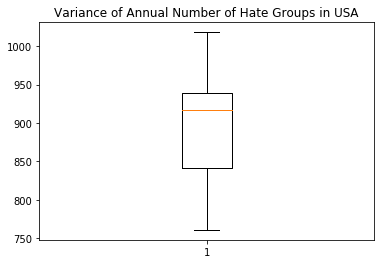

In [20]:
plt.boxplot(overall_year)
plt.title("Variance of Annual Number of Hate Groups in USA")
plt.show()

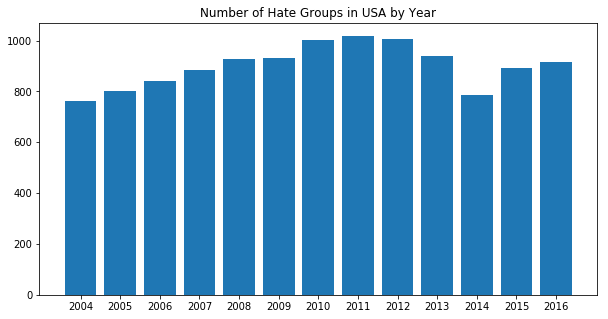

In [21]:
overall_year = overall_year.reset_index()

plt.figure(figsize=(10,5))
plt.bar(x=overall_year.iloc[:,0], height=overall_year.iloc[:,1])
plt.xticks(overall_year.iloc[:,0])
plt.title('Number of Hate Groups in USA by Year')
plt.show()

(array([2., 1., 0., 1., 1., 1., 4., 0., 0., 3.]),
 array([ 761. ,  786.7,  812.4,  838.1,  863.8,  889.5,  915.2,  940.9,
         966.6,  992.3, 1018. ]),
 <a list of 10 Patch objects>)

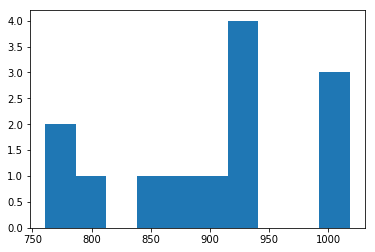

In [22]:
plt.hist(overall_year.iloc[:,1])


(look into that more, get some statisticis - mean, std dev, statistically different variances???) 

## States by number of hate groups (over the years)

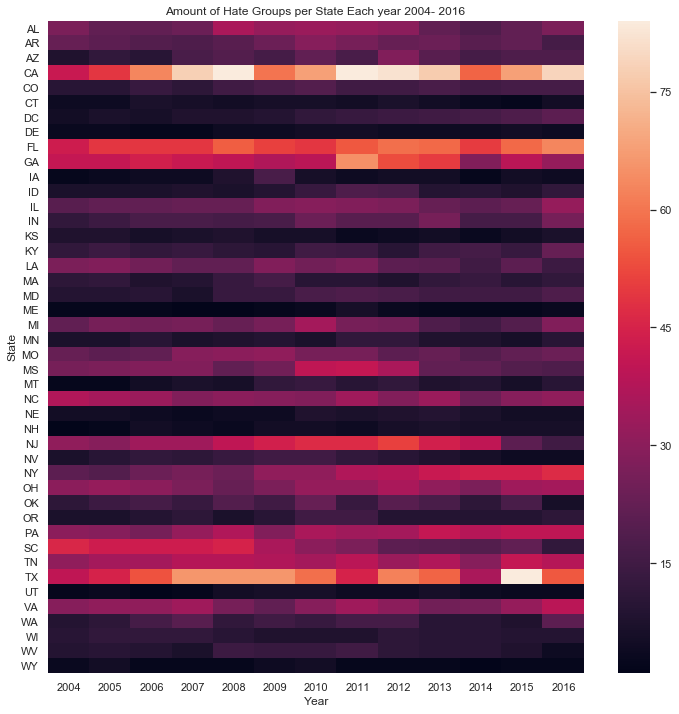

In [23]:
sns.set()                      

count_by_state = hatemaps.groupby(['State', 'Year'])['Group Name'].count().unstack().dropna()

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(count_by_state,
            linewidths=0, ax=ax)
plt.title('Amount of Hate Groups per State Each year 2004- 2016 ')
plt.show()


The heatmap above is a little bit hard to read but at a glance, shows the general amount of hate groups in each state is low, and shows a couple of outliers such as Texas, especially in 2015, GA, FL and CA in general. Let's take a look at the boxplot of each state to get another look. 

(get some statitics here too) 

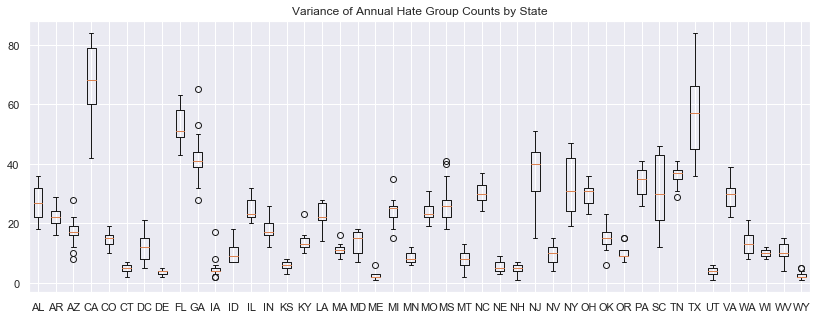

In [24]:
plt.figure(figsize=(14,5))
plt.boxplot(count_by_state, labels=count_by_state.index.values)
plt.title("Variance of Annual Hate Group Counts by State")
plt.show()

With this look, it is easier to see the outliers and how different they are from the other states - namely, CA, FL, GA, and TX. It is also interesting to see what each state's average and standard deviation is. CA seems to have a higher amount on average and a wide range, while TX, for example, has a wider ranger and a lower number on average.

## Number and size of of different hate (group) types

The hate groups are divided up into the following hate types.

In [25]:
list(set(hatemaps['Hate Type']))

['Neo-Nazi',
 'Black Nationalist',
 'General/Other',
 'Anti-Muslim',
 'Racist / Hate Music',
 'Neo-Confederate',
 'Racist Skinhead',
 'Anti-LGBT',
 'Ku Klux Klan',
 'Christian Identity',
 'Holocaust Denial',
 'White Nationalist',
 'Anti-Immigrant',
 'Radical Traditional Catholicism']

Let's look at how many distinct hate groups make a part of each hate type below. I'm going to split this into two separate charts to make it a little easier to look at. I'll split the groups up at the median of the means of each hate type size.

In [26]:
# size of hate types by number of groups in each

group_year = hatemaps.groupby(['Year','Hate Type'])['Group Name'].nunique().unstack()

larger_half = []
smaller_half = []

for col in group_year.columns.values:
    # if the mean size of this hate type is greater than the median mean size of all the types..
    if np.mean(group_year[col]) >= np.median(np.mean(group_year)):
        larger_half.append(col)
    else:
        smaller_half.append(col)
        
# making smaller dataframes
larger_ht = hatemaps.loc[hatemaps['Hate Type'].isin(larger_half)]
smaller_ht = hatemaps.loc[hatemaps['Hate Type'].isin(smaller_half)]

In [27]:
# grouping them to get the count of Groups per Hate Type in each dataframe
larger_grouped = larger_ht.groupby(['Year','Hate Type'])['Group Name'].nunique().unstack()
smaller_grouped = smaller_ht.groupby(['Year','Hate Type'])['Group Name'].nunique().unstack()

# pushing the index over so "year" becomes a column
larger_grouped = larger_grouped.reset_index()
smaller_grouped = smaller_grouped.reset_index()

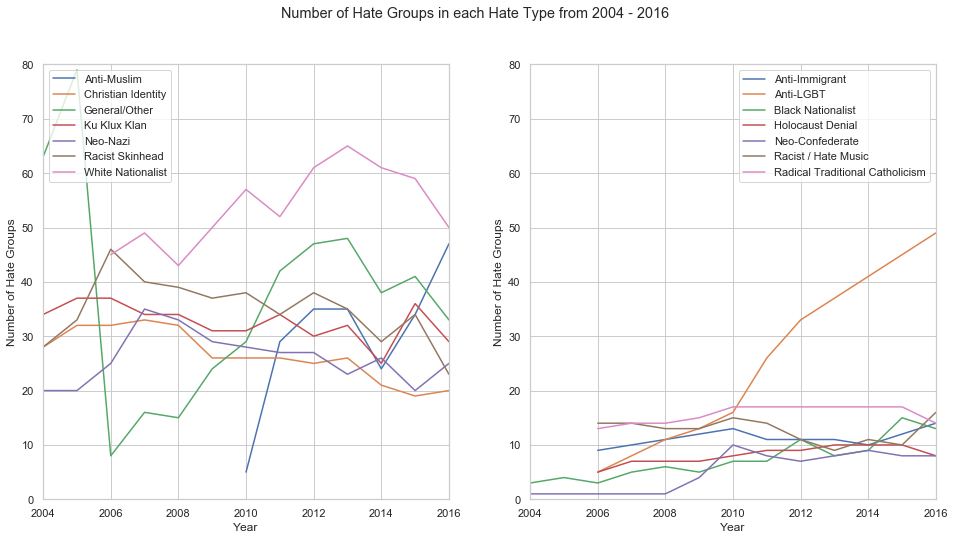

In [28]:
# plotting on 2 separate line plots to see the data more clearly

sns.set(style="whitegrid")

plt.figure(figsize=(16,8))
plt.suptitle('Number of Hate Groups in each Hate Type from 2004 - 2016')

plt.subplot(1,2,1)
ax = plt.gca()

for col in larger_half:
    larger_grouped.plot(kind='line',x='Year',y=col,ax=ax)
plt.ylim(0,80)
plt.xlim(2004,2016)
ax.set(ylabel='Number of Hate Groups', xlabel="Year")

plt.subplot(1,2,2)
ax = plt.gca()
for col in smaller_half:
    smaller_grouped.plot(kind='line',x='Year',y=col,ax=ax)
plt.ylim(0,80)
plt.xlim(2004,2016)
ax.set(ylabel='Number of Hate Groups', xlabel="Year")


plt.show()

Because these charts are easy to read with one standardized y axis, I plotted them that way to simplify comparison. It appears that the number of White Nationalist groups was higher than the majority of the the other groups, and generally increased from 2004 until 2013, at which point the number of groups started to drop. 

There is also an interesting outlier in General / Other, with a large number in year 2005, and then a large drop. This could be due to reclassifying the groups, perhaps, so we'll take that with a grain of salt.

Also of note is that some groups either only existed, or were counted, from year 2006. Finally, while most Hate Types do not have a steady increase, there are 2 exceptions to this - Anti-Muslim (had one drop in 2014, but other than that, steady incline) and Anti-LGBT.

##  Number of states with each hate type's presence

Let's take a quick general look at the number of states that have a presence of each hate type, organized by year, so we can see the growth / decline of each over time.

First let's look at the mean each year.

In [29]:
state_type = hatemaps.groupby(['Year',
                  'Hate Type'])['State'].nunique().dropna()
state_type = state_type.reset_index()


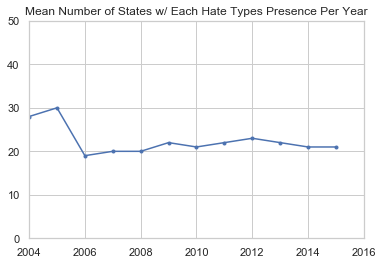

In [30]:
# get the line of the average for each year

mean_x = []
mean_y = []

mean_line = []
for i, year in enumerate(range(min(state_type['Year']), max(state_type['Year']))):
    mean_line.append((i+2004, int(np.mean(state_type[state_type['Year'] == year]['State']))))
    mean_x.append(i+2004)
    mean_y.append(int(np.mean(state_type[state_type['Year'] == year]['State'])))
    
plt.plot(mean_x, mean_y, marker='.')
plt.title('Mean Number of States w/ Each Hate Types Presence Per Year')
plt.ylim([0,50])
plt.xlim(min(state_type['Year']), max(state_type['Year']))
plt.show()


Next let's look at the variance of each group's size.

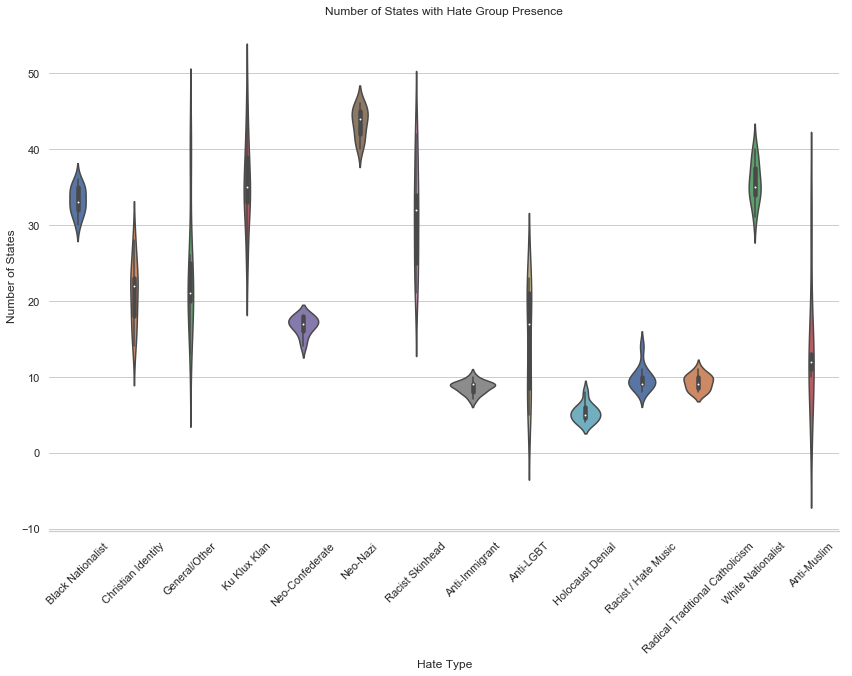

In [31]:
sns.set(style="whitegrid")

g = sns.catplot(x="Hate Type", y="State", data=state_type, aspect=1.5,
                   height=8, kind="violin", palette="deep",ci=95, dodge=True)
g.despine(left=True)
g.set_ylabels("Number of States")
g.set_xticklabels(rotation=45)
plt.title('Number of States with Hate Group Presence')
plt.show()

The graph above just shows the variance / distribution of the number of states of each hate group over the time period, without clearly showing the growth or decline linearly, which we'll look at below. However, it does show the types with the largest consistent number of states and the ones with the greatest and least variance, or the hate types that have had the greatest changes.

It looks like the following groups had the greatest growth/decline: General/Other, Racist Skinhead, Anti LGBT, and Anti-Muslim.

The groups that appear to have maintained the largest number of states consistently are Neo Nazi, and White Nationalist, followed by Black Nationalist.

At a glance they look to be quite different. Let's see if the difference is statistically significant. We'll use the Tukey range test because the variances aren't normally distributed and there are multiple pairwise comparisons.



In [32]:
compare_htypes = state_type.pivot_table(columns="Hate Type", index="Year",values="State")

In [33]:
types = compare_htypes.columns.values.tolist()

In [34]:
goodluck = []

for col in types:
    ok = compare_htypes[col].fillna(0).tolist()
    for val in ok:
        goodluck.append(val)

heights=np.asarray(goodluck)

materials = np.array(types)
materials = np.repeat(materials, 13)

tukey = pairwise_tukeyhsd(endog=heights,      # Data
                          groups=materials,   # Groups
                          alpha=0.05)         # Significance level

#tukey.summary() 

# Since there are so many comparisons here, I'm just going to show the ones where the null 
# hypothesis should be rejected (reject = True)
df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])


In [35]:
df[df['reject'] == True]

,group1,group2,meandiff,lower,upper,reject
2,Anti-Immigrant,Black Nationalist,25.9231,17.4989,34.3473,True
3,Anti-Immigrant,Christian Identity,13.6923,5.2681,22.1165,True
4,Anti-Immigrant,General/Other,16.2308,7.8066,24.6550,True
6,Anti-Immigrant,Ku Klux Klan,28.0000,19.5758,36.4242,True
7,Anti-Immigrant,Neo-Confederate,9.4615,1.0373,17.8858,True
8,Anti-Immigrant,Neo-Nazi,36.1538,27.7296,44.5781,True
10,Anti-Immigrant,Racist Skinhead,23.8462,15.4219,32.2704,True
12,Anti-Immigrant,White Nationalist,22.8462,14.4219,31.2704,True
14,Anti-LGBT,Black Nationalist,20.6154,12.1912,29.0396,True
16,Anti-LGBT,General/Other,10.9231,2.4989,19.3473,True


Next, let's look at the size changes of each group over time.

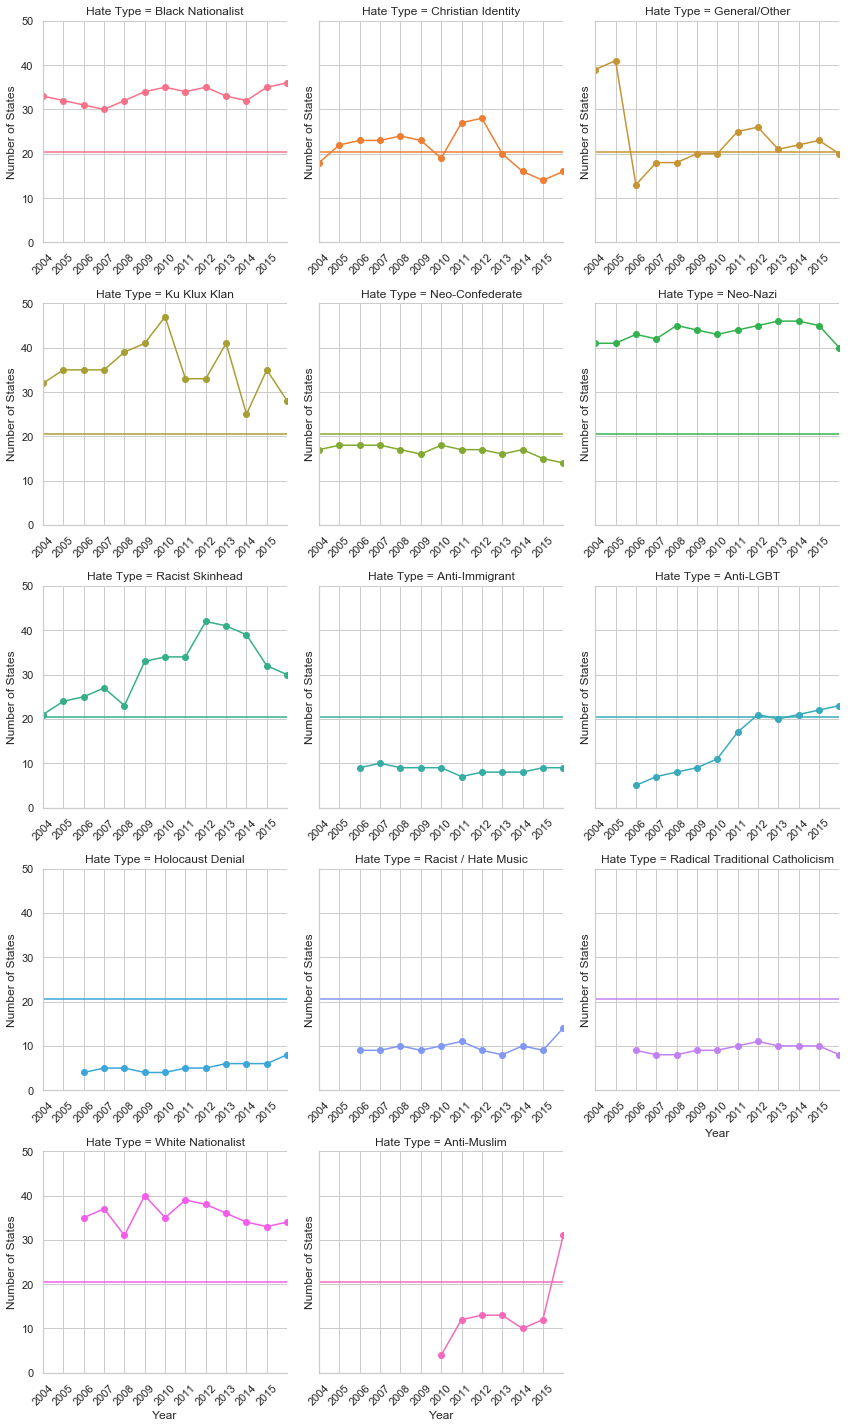

In [36]:
sns.set(style="whitegrid")

g = sns.FacetGrid(state_type, col='Hate Type', col_wrap=3, height=4,
                 ylim=(0,50), xlim=(min(state_type['Year']),max(state_type['Year'])),  palette="husl", hue="Hate Type")

g.map(plt.axhline, y=np.median(state_type['State']))
#g.map(plt.plot,x=mean_x,y=mean_y, marker='.', color='r')

g = g.map(plt.plot,'Year','State',marker="o") 


g.set(xticks=np.arange(min(state_type['Year']),max(state_type['Year'])), ylabel="Number of States")

for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=45)

g.fig.tight_layout(w_pad=1)

plt.show()


Each chart above shows the number of states with a presence of each hate type in each year, and it has the average overall number of states for each group marked as a line to help make comparison easier.



Below, we'll more directly compare the sizes of each hate group to each other.

Because of the large number of hate types, and the amount of states varying widely across those hate types, I split this into 3 separate charts that each have unique y axis ranges. It is a good idea to keep that in mind when comparing the information. 

In [37]:

# splitting up the data again so the charts are easier to read

one = ['White Nationalist','Ku Klux Klan',   'Neo-Nazi',     
        'Christian Identity', 'Black Nationalist',]

two = ['Anti-Muslim', 'Anti-LGBT',  'Neo-Confederate',
       'General/Other','Racist Skinhead', ]

three = ['Anti-Immigrant', 'Holocaust Denial',
         'Racist / Hate Music', 'Radical Traditional Catholicism']


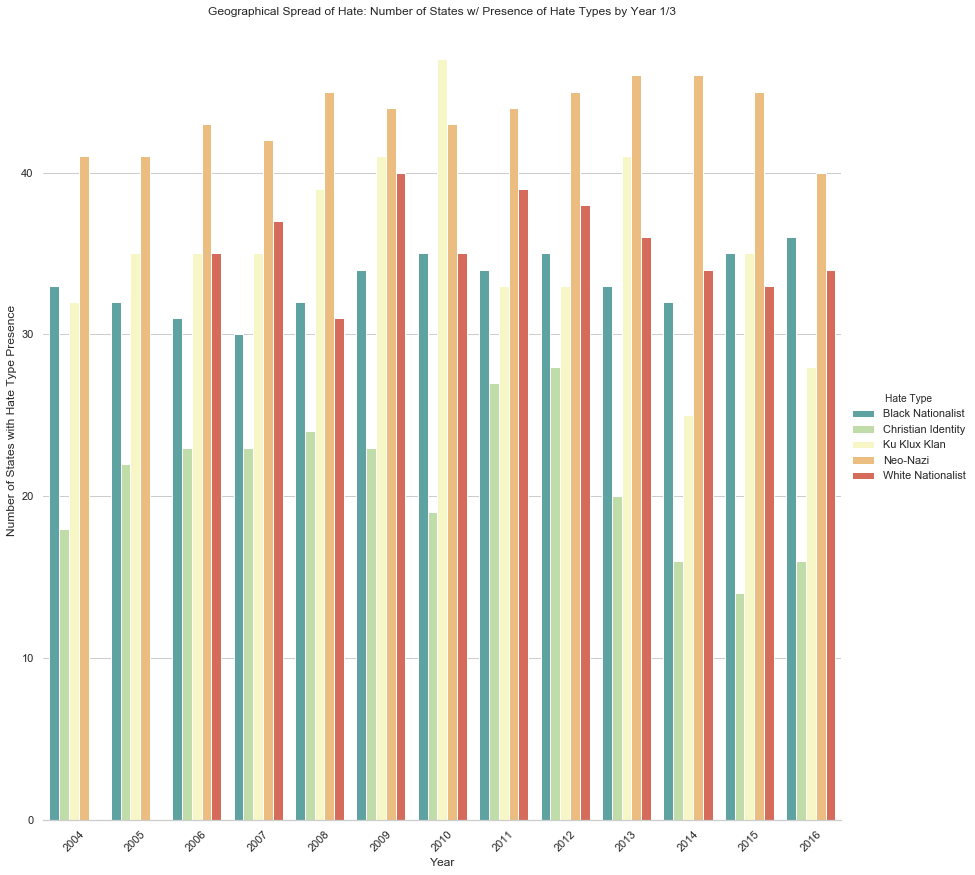

In [38]:
# chart 1
sns.set(style="whitegrid")

g = sns.catplot(x="Year", y="State", hue="Hate Type", 
                data=state_type.loc[state_type['Hate Type'].isin(one)],
               height=12, kind="bar", palette="Spectral_r", ci=95)
g.despine(left=True)
g.set_ylabels("Number of States with Hate Type Presence")
g.set_xlabels("Year")
g.set_xticklabels(rotation=45)
plt.title('Geographical Spread of Hate: Number of States w/ Presence of Hate Types by Year 1/3')
plt.show()

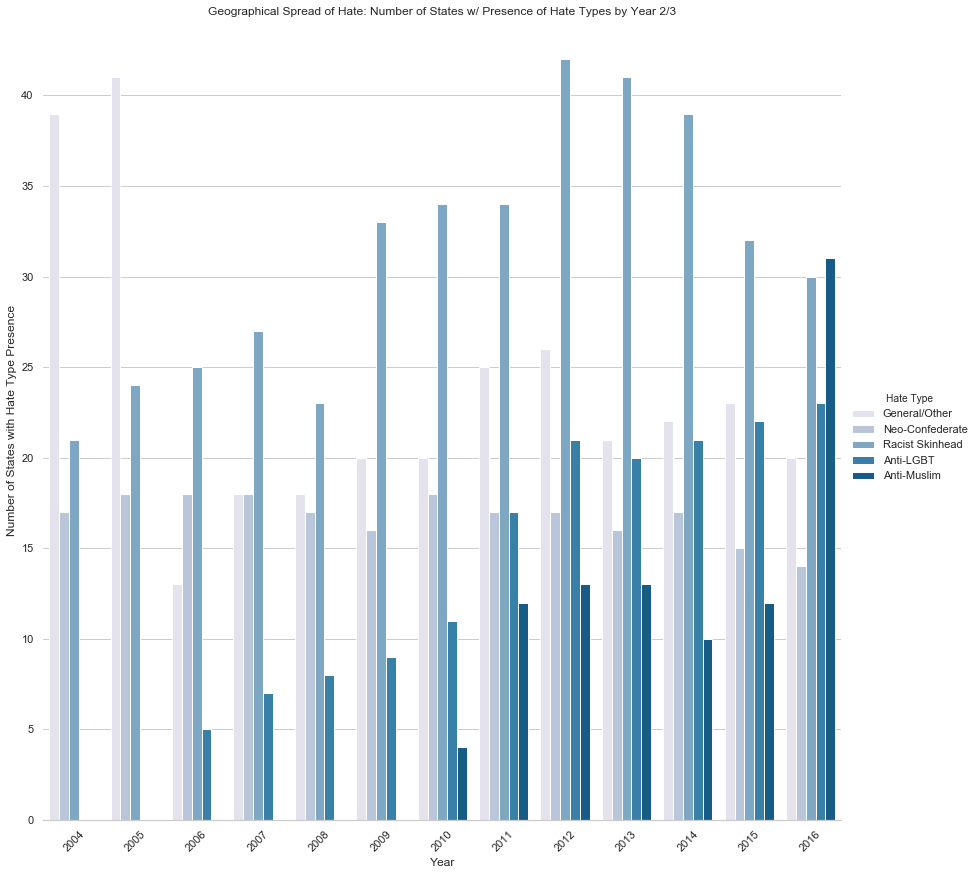

In [39]:
# chart 2

g = sns.catplot(x="Year", y="State", hue="Hate Type", 
                data=state_type.loc[state_type['Hate Type'].isin(two)],
               height=12, kind="bar", palette="PuBu", ci=95)
g.despine(left=True)
g.set_ylabels("Number of States with Hate Type Presence")
g.set_xlabels("Year")
g.set_xticklabels(rotation=45)
plt.title('Geographical Spread of Hate: Number of States w/ Presence of Hate Types by Year 2/3')
plt.show()

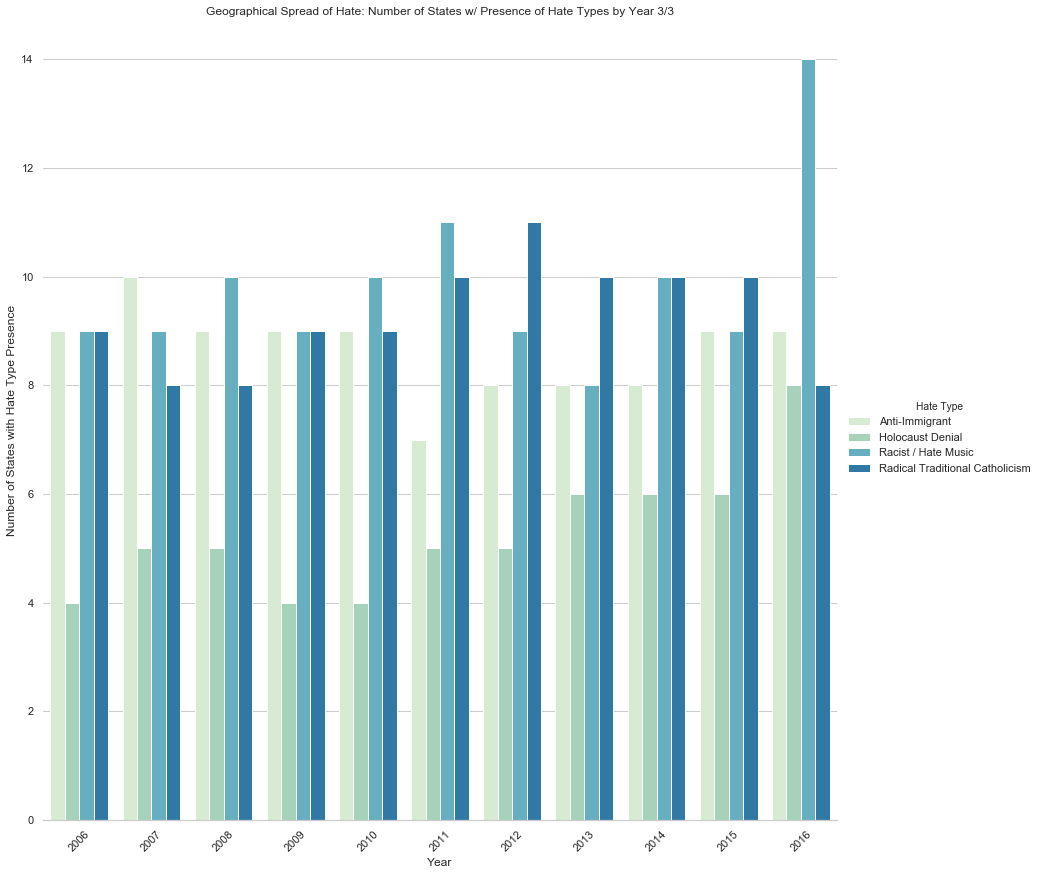

In [40]:
# chart 3

g = sns.catplot(x="Year", y="State", hue="Hate Type", 
                data=state_type.loc[state_type['Hate Type'].isin(three)],
               height=12, kind="bar", palette="GnBu", ci=95)
g.despine(left=True)
g.set_ylabels("Number of States with Hate Type Presence")
g.set_xlabels("Year")
g.set_xticklabels(rotation=45)
plt.title('Geographical Spread of Hate: Number of States w/ Presence of Hate Types by Year 3/3')
plt.show()

(talk about that a little bit)

Let's look closer at the hate groups, and see which ones are present in the largest number of cities and states.

In [41]:
hatemaps.groupby(['Year','Group Name'])['City'].count().sort_values(ascending=False).head(10)


Year  Group Name                 
2012  nation of islam                105
2007  league of the south            102
2006  league of the south            100
2005  league of the south             97
2004  league of the south             96
2008  league of the south             90
2011  nation of islam                 84
2016  nation of islam                 81
2006  national socialist movement     81
2015  nation of islam                 80
Name: City, dtype: int64

It looks like the Nation of Islam has had the largest geographical presence by city. Below, grouped by unique states, it shows a different picture. From this data, it appears that some of the groups that exist in more cities are more concentrated in certain states.

In [42]:
hatemaps.groupby(['Year',
                  'Group Name'])['State'].nunique().sort_values(ascending=False).head(10)

Year  Group Name                                     
2013  national socialist movement                        43
2012  national socialist movement                        41
2014  national socialist movement                        40
2011  national socialist movement                        39
2015  national socialist movement                        39
2010  brotherhood of klans knights of the ku klu klan    38
2013  loyal white knights of the ku klu klan             38
2006  national socialist movement                        35
2009  national socialist movement - nsm                  35
2012  nation of islam                                    34
Name: State, dtype: int64

### Types of Crimes in the areas of the 5 largest hate groups

First, getting the names of the 5 largest hate groups (largest in this case will be with the greatest number of states).

In [43]:
topfive = hatemaps.groupby(['Year',
                  'Group Name'])['State'].nunique().sort_values(ascending=False).reset_index()['Group Name'].head(15).unique().tolist()


In [44]:
for htype in topfive:
    hatemaps[htype] = 0
    
# then add the names to the dataframe

for i, name in enumerate(hatemaps['Group Name'].tolist()):
    if name in topfive:
        hatemaps.loc[i, name] =1

In [45]:
hatemaps.columns.values

array(['Group Name', 'City', 'State', 'Hate Type', 'Year',
       'national socialist movement',
       'brotherhood of klans knights of the ku klu klan',
       'loyal white knights of the ku klu klan',
       'national socialist movement - nsm', 'nation of islam',
       'united northern and southern knights of the ku klu klan'],
      dtype=object)

In [46]:
amess = pd.merge(state_totals, hatemaps.groupby(['Year','State'])['national socialist movement',
       'brotherhood of klans knights of the ku klu klan',
       'loyal white knights of the ku klu klan',
       'national socialist movement - nsm', 'nation of islam',
       'united northern and southern knights of the ku klu klan'].count(), on=['Year','State'],
        how='left').fillna(0)

In [47]:
amess.head()

,Year,State,REA,Religion,Disability,Gender,Gender Identity,Sexual orientation,Total offenses,Aggravated assault,...,Racist / Hate Music,Racist Skinhead,Radical Traditional Catholicism,White Nationalist,national socialist movement,brotherhood of klans knights of the ku klu klan,loyal white knights of the ku klu klan,national socialist movement - nsm,nation of islam,united northern and southern knights of the ku klu klan
0,2006,AL,1.0,0.0,0.0,0.0,0.0,0.0,1,0,...,0.0,0.0,0.0,3.0,22,22,22,22,22,22
1,2006,AK,4.0,0.0,0.0,0.0,0.0,2.0,11,3,...,0.0,0.0,0.0,0.0,1,1,1,1,1,1
2,2006,AZ,90.0,30.0,1.0,0.0,0.0,28.0,215,23,...,0.0,2.0,0.0,0.0,10,10,10,10,10,10
3,2006,AR,97.0,3.0,2.0,0.0,0.0,11.0,133,16,...,0.0,1.0,0.0,1.0,19,19,19,19,19,19
4,2006,CA,844.0,204.0,3.0,0.0,0.0,246.0,1604,372,...,3.0,13.0,2.0,1.0,63,63,63,63,63,63


In [48]:
# making list of crime categories

crimes_c_persons = ['Aggravated assault','Intimidation',
                    'Murder and non negligent manslaughter','Simple assault', 
                    'Rape (legacy)', 'Rape (revised)', 'Other Crimes c persons']
crimes_c_property = ['Arson', 'Burglary', 'Destruction damage vandalism',
                     'Larceny theft', 'Motor vehicle theft', 'Robbery',
                     'Other Crimes c property']
crimes_c_society = ['Crimes c society']


In [50]:
old_crimes = ['Total offenses', 'Aggravated assault', 'Intimidation',
       'Murder and non negligent manslaughter', 'Simple assault',
       'Rape (legacy)', 'Rape (revised)', 'Other Crimes c persons',
       'Arson', 'Burglary', 'Destruction damage vandalism',
       'Larceny theft', 'Motor vehicle theft', 'Robbery',
       'Other Crimes c property', 'Crimes c society']

crimes = ['Total crimes persons', 'Total crimes property','Crimes c society']
biases = ['REA','Religion','Disability','Gender', 'Gender Identity','Sexual orientation']

In [59]:
amess['Total crimes persons'] = amess[crimes_c_persons].sum(axis=1)
amess['Total crimes property'] = amess[crimes_c_property].sum(axis=1)
amess['Crimes c society'] = amess[crimes_c_society].sum(axis=1)                       

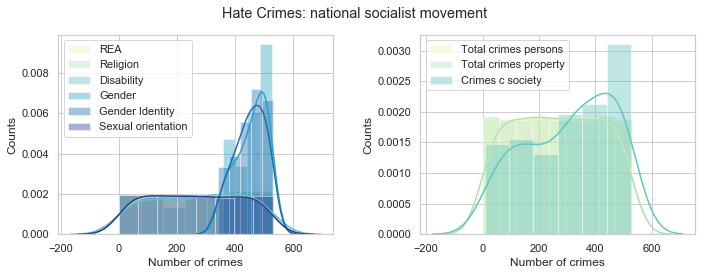

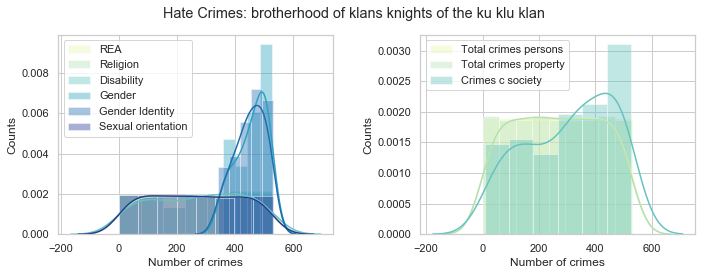

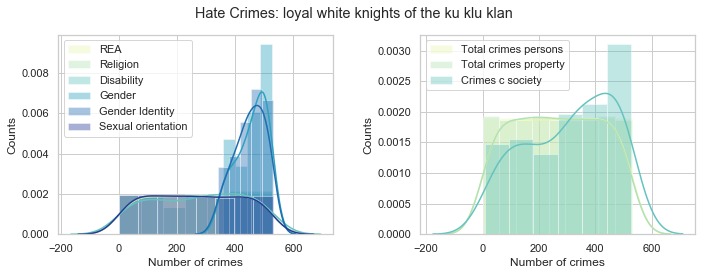

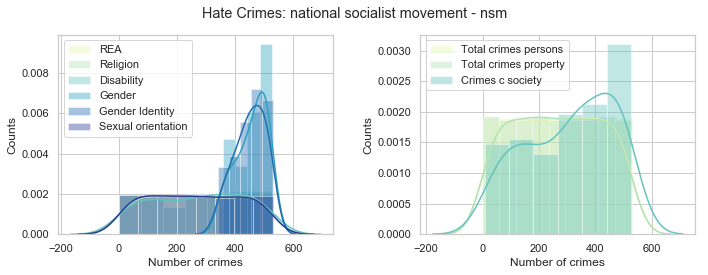

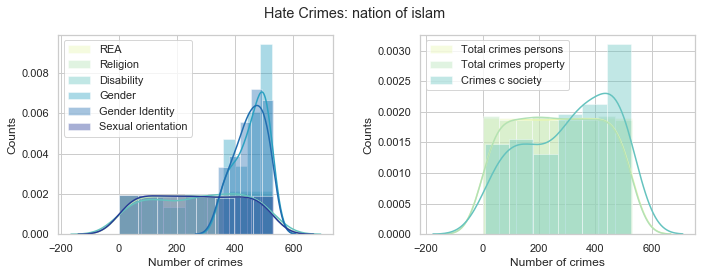

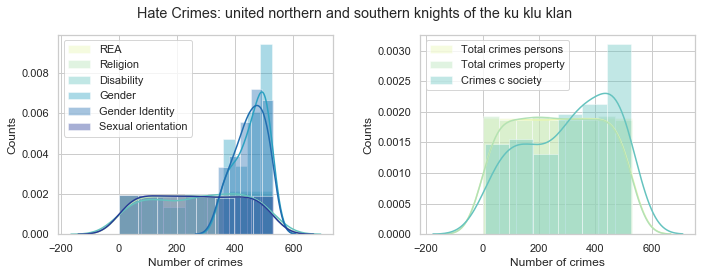

In [60]:
amess2 = amess

for htype in topfive:
    
    sns.set(style="whitegrid", palette="YlGnBu")

    plt.figure(figsize=(10,4))
    plt.suptitle('Hate Crimes: '+htype)
    plt.subplot(1,2,1)
    ax = plt.gca()
    for col in biases:
        ax = sns.distplot(amess2[amess2[htype] > 0][col].nonzero(), label=col, hist=True) 
        ax.set(ylabel="Counts", xlabel="Number of crimes")
    plt.legend()
    
    plt.subplot(1,2,2)
    ax = plt.gca()
    for col in crimes:
        ax = sns.distplot(amess2[amess2[htype] > 0][col].nonzero(), label=col, hist=True)
        ax.set(ylabel="Counts", xlabel="Number of crimes")
        ax.legend()
    
    plt.tight_layout(w_pad=2, rect=[0, 0.03, 1, 0.95])

    plt.show()

It looks like the distributions are exactly the same. Maybe looking at just specific hate groups is not enough - these 5 hate groups are a relatively small sample size when compared to the rest of the hate types. 

Let's look at a slightly wider view.

#### Types of Crimes in the areas of hate types

This will look at the types of crimes in locations with one or more hate group from each hate type.

In [61]:
#  going to rename some columns for the sake of the labels

crimes_c_persons = ['A assault', 'Intimidation', 'Murder','S assault', 
                    'Rape L', 'Rape R', 'Other Pl']
crimes_c_property = ['Arson', 'Burglary', 'Destruction',
                     'Larceny', 'MV theft', 'Robbery',
                     'Other Pr']
crimes_c_society = ['Crimes c society']


amess2 = by_city_only.rename(index=str, columns={'Aggravated assault': 'A assault',
                    'Murder and non negligent manslaughter': 'Murder',
                    'Simple assault': 'S assault', 
                    'Rape (legacy)': 'Rape L', 'Rape (revised)': 'Rape R', 
                    'Other Crimes c persons' : 'Other Pl',
                     'Destruction damage vandalism': 'Destruction',
                     'Larceny theft':'Larceny', 'Motor vehicle theft':'MV theft',
                     'Other Crimes c property': 'Other Pr'})

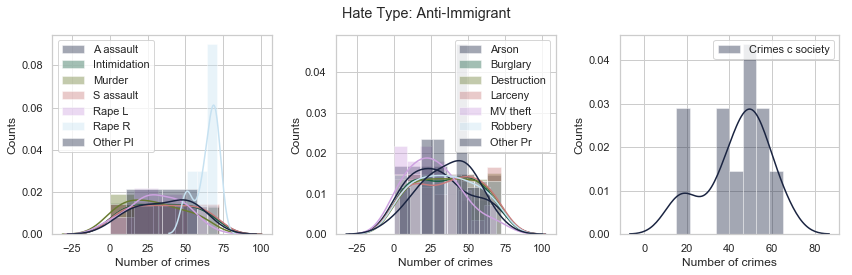

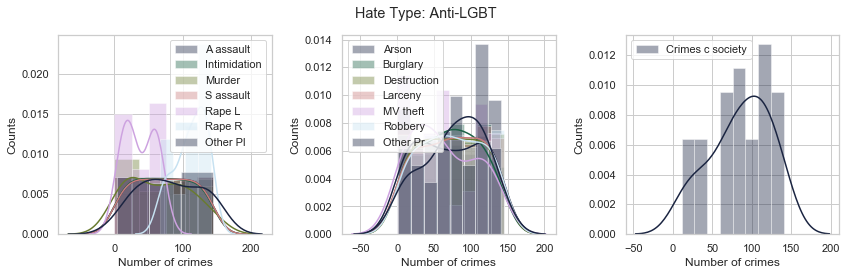

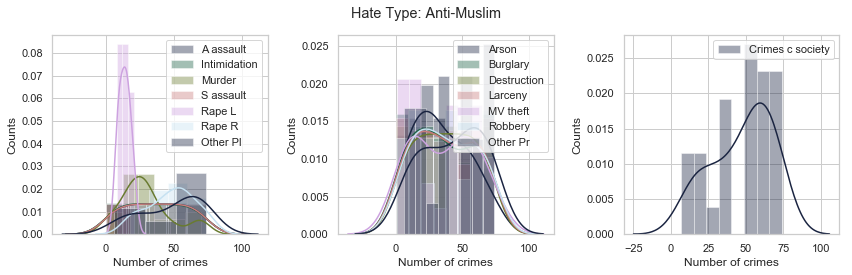

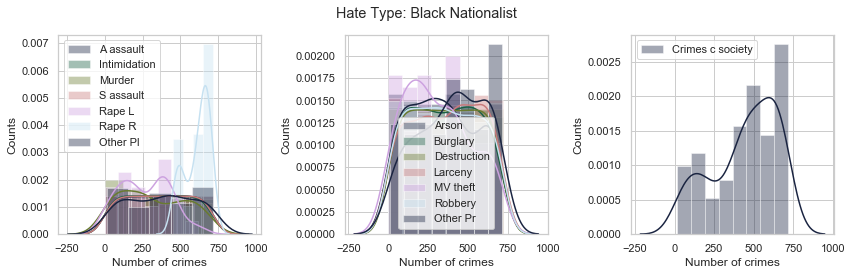

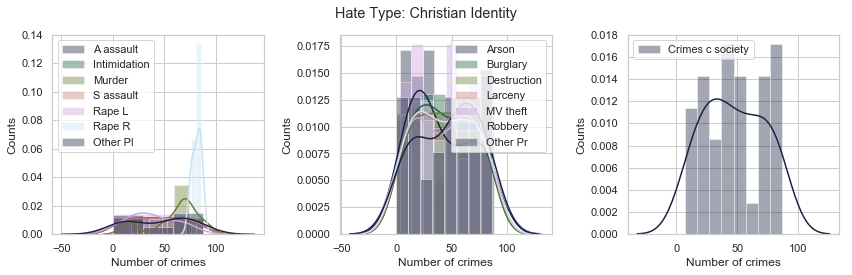

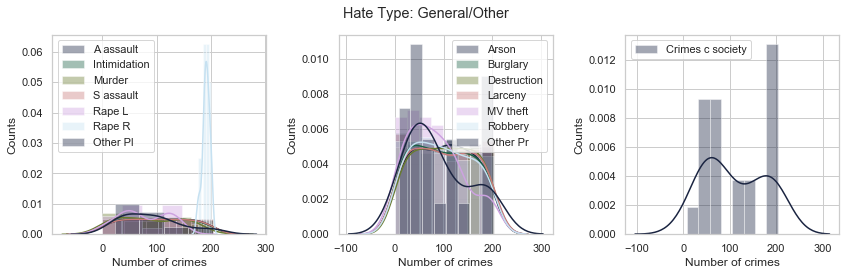

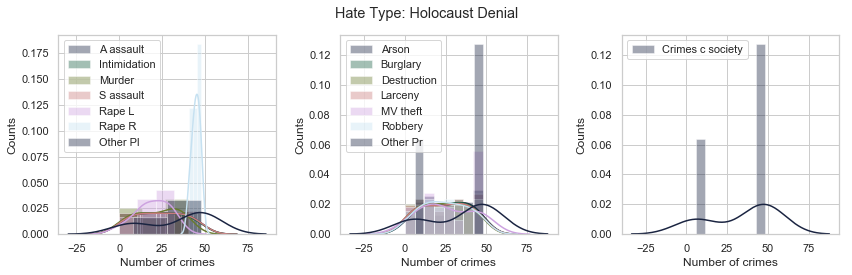

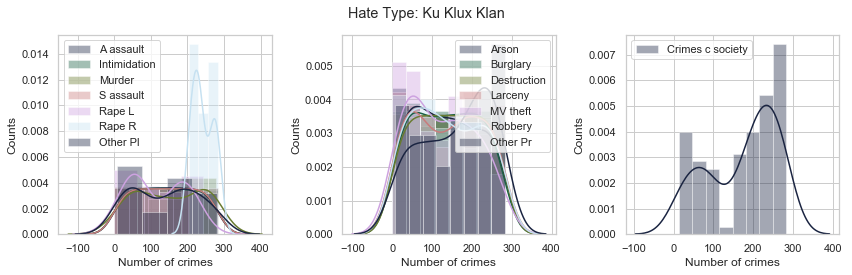

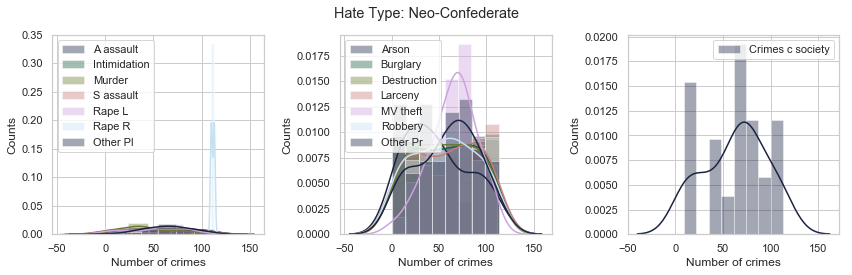

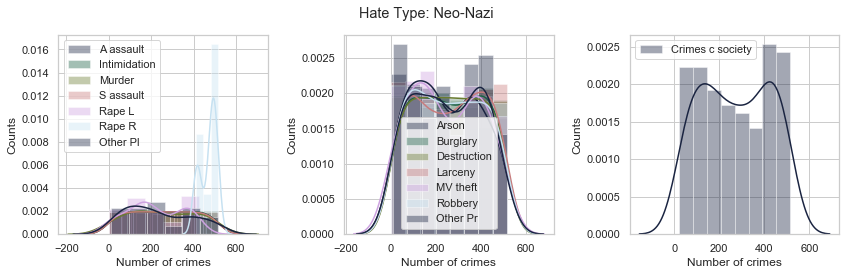

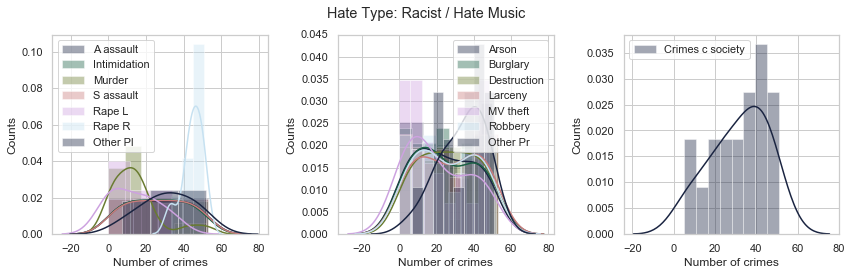

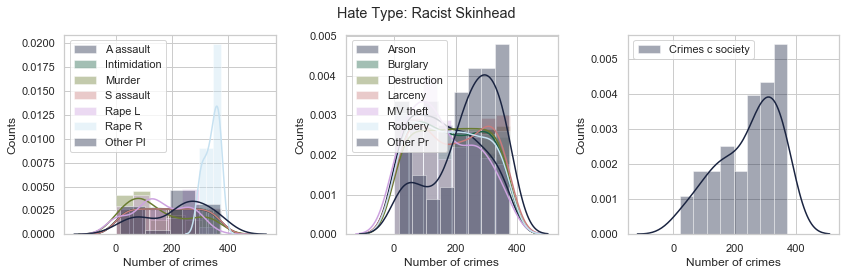

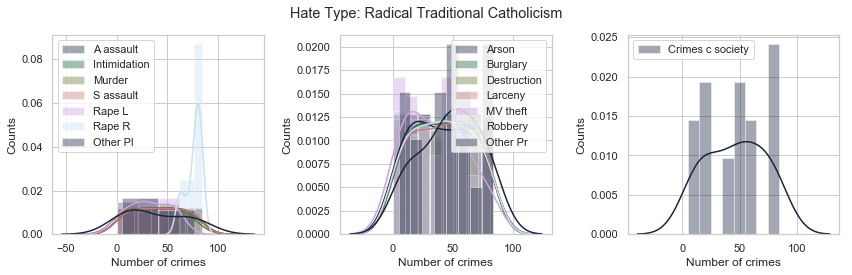

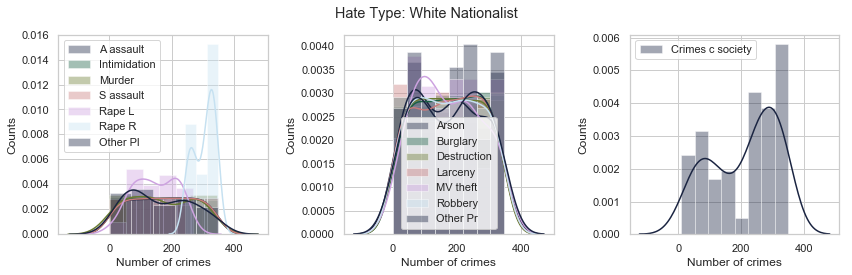

In [62]:
hatetypes = ['Anti-Immigrant','Anti-LGBT', 'Anti-Muslim', 
             'Black Nationalist', 'Christian Identity',
       'General/Other', 'Holocaust Denial', 'Ku Klux Klan', 'Neo-Confederate',
       'Neo-Nazi', 'Racist / Hate Music', 'Racist Skinhead',
       'Radical Traditional Catholicism', 'White Nationalist']

for htype in hatetypes:
    
    sns.set(style="whitegrid", palette="cubehelix")

    plt.figure(figsize=(12,4))
    plt.suptitle('Hate Type: '+htype)
    plt.subplot(1,3,1)
    ax = plt.gca()
    for col in crimes_c_persons:
        ax = sns.distplot(amess2[amess2[htype] > 0][col].fillna(0).nonzero(), 
                          label=col, hist=True) 
        ax.set(ylabel="Counts", xlabel="Number of crimes")
    plt.legend()
    
    plt.subplot(1,3,2)
    ax = plt.gca()
    for col in crimes_c_property:
        ax = sns.distplot(amess2[amess2[htype] > 0][col].fillna(0).nonzero(),
                          label=col, hist=True, bins=8)
        ax.set(ylabel="Counts", xlabel="Number of crimes")
        ax.legend()
        
    plt.subplot(1,3,3)
    ax = plt.gca()
    for col in crimes_c_society:
        ax = sns.distplot(amess2[amess2[htype] > 0][col].fillna(0).nonzero(),
                          label=col, hist=True, bins=8)
        ax.set(ylabel="Counts", xlabel="Number of crimes")
        ax.legend()
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.show()

It appears that the distributions of different crimes does vary depending on which hate type is present. For example, Neo Nazis seem to have a higher number of Crimes against society than many other groups.


Let's compare with the distribution of hate crimes in each city by bias category.

#### Hate Crimes in Each Category per City


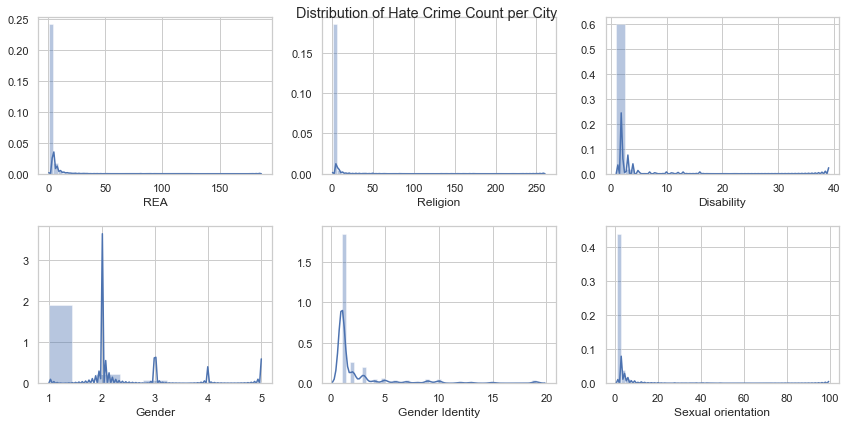

In [63]:
cols = ['REA', 'Religion', 'Disability', 'Gender',
       'Gender Identity', 'Sexual orientation']

sns.set(style="whitegrid")

f, axes = plt.subplots(2, 3, figsize=(12, 6), sharex=False)
sns.despine(left=True)

for i in range(2*3):
    plt.subplot(2,3,i+1)
    sns.distplot(by_city_only[by_city_only[cols[i]] > 0][cols[i]].dropna().sort_values())
    plt.tight_layout()
    
plt.suptitle('Distribution of Hate Crime Count per City')
plt.show()

# add y label axis

## Chronological Number of hate crimes per city by type

In [64]:
bias_crimes_bt = pd.read_csv('/Users/gemma/Documents/data science/fc-partial_bias_byst.csv')

In [65]:
bias_crimes_bt.head()

,Year,Agency type,Agency name,REA,Religion,Disability,Gender,Gender Identity,Sexual orientation,State,...,Motor vehicle theft,Murder and non negligent manslaughter,Other Crimes c persons,Other Crimes c property,Rape (legacy),Rape (revised),Robbery,Simple assault,State_name,Total offenses
0,2006,Total,Total,1.0,0.0,0.0,NaN,NaN,0.0,AL,...,0,0,0,0,0.0,NaN,0,0,Alabama,1
1,2006,Cities,Total,1.0,0.0,0.0,NaN,NaN,0.0,AL,...,0,0,0,0,0.0,NaN,0,0,Alabama,1
2,2006,Cities,Atmore,1.0,0.0,0.0,NaN,NaN,0.0,AL,...,0,0,0,0,0.0,NaN,0,0,Alabama,1
3,2006,Total,Total,4.0,0.0,0.0,NaN,NaN,2.0,AK,...,0,0,0,0,0.0,NaN,0,5,Alaska,11
4,2006,Cities,Total,4.0,0.0,0.0,NaN,NaN,2.0,AK,...,0,0,0,0,0.0,NaN,0,5,Alaska,11


In [66]:
# make a column to label the bias category in the row, as well as the count

bias_crimes_bt['Bias Category'] = np.nan
bias_crimes_bt['Count'] = np.nan

In [67]:
# adding in the values row by row

for i in range(len(bias_crimes_bt)):
    for x in cols:
        if bias_crimes_bt.loc[i, x] > 0:
            bias_crimes_bt.loc[i, 'Bias Category' ] = x
            bias_crimes_bt.loc[i, 'Count'] = bias_crimes_bt.loc[i, x]

In [68]:
# dropping the totals which will skew the results
bias_crimes_bt = bias_crimes_bt[bias_crimes_bt['Agency name'] != 'Total']

# getting the average across all the cities
grouped_bcbt = bias_crimes_bt.groupby(['Year','Bias Category'])['Count'].mean().reset_index()

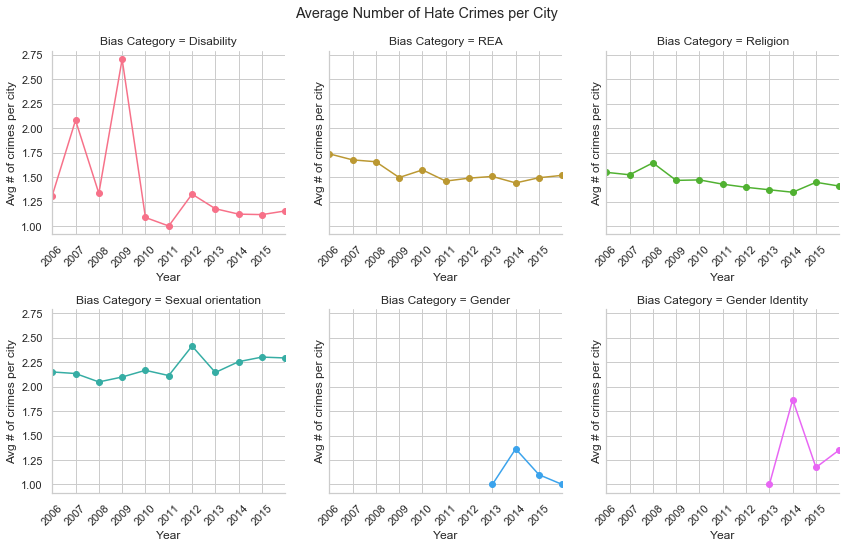

In [69]:
sns.set(style="whitegrid")

g = sns.FacetGrid(grouped_bcbt.dropna(), col='Bias Category', col_wrap=3, height=4,
                xlim=(min(grouped_bcbt['Year']),max(grouped_bcbt['Year'])), 
                palette='husl', hue='Bias Category')

g = g.map(plt.plot,'Year', 'Count', marker="o") 

g.set(xticks=np.arange(min(grouped_bcbt['Year']), max(grouped_bcbt['Year'])), 
      ylabel="Avg # of crimes per city", xlabel="Year")

for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=45)

g.fig.tight_layout(w_pad=2, rect=[0, 0.03, 1, 0.95])

plt.suptitle('Average Number of Hate Crimes per City')
plt.show()

In [70]:
# getting the variance across all the cities

sum_of_counts = bias_crimes_bt.groupby(['Year','State','Agency name','Bias Category'])['Count'].sum().reset_index()

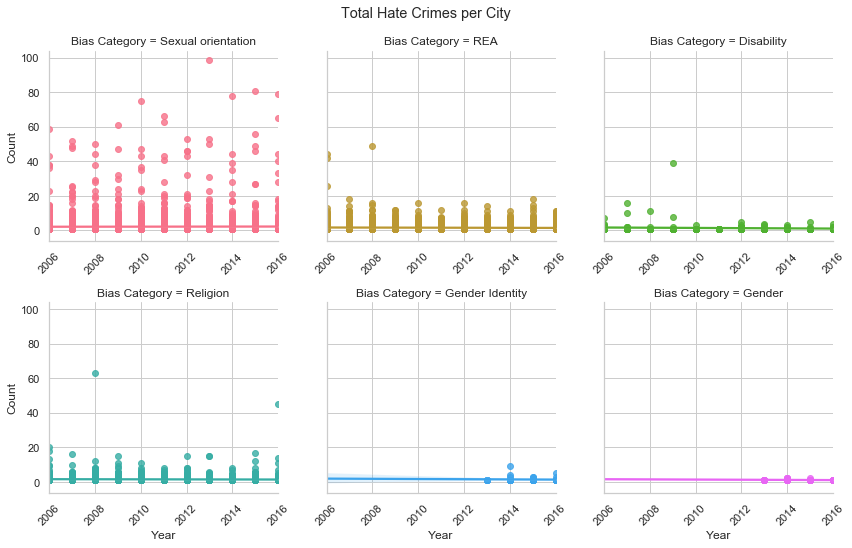

In [71]:
sns.set(style="whitegrid")

g = sns.lmplot(x="Year", y="Count", hue="Bias Category", col="Bias Category",
               col_wrap=3, height=4, data=sum_of_counts, palette='husl')


g = (g.set(xlim=(min(sum_of_counts['Year']), max(sum_of_counts['Year']))))

for ax in g.axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=45)

g.fig.tight_layout(w_pad=2, rect=[0, 0.03, 1, 0.95])

plt.suptitle('Total Hate Crimes per City')

plt.show()

Let's take a look at the Tukey test to see if these variances differ in a statitstically significant way.

In [72]:
# first let's drop any that don't have a bias category

bias_crimes_bt.dropna(axis=0, subset=['Bias Category'], inplace=True)


In [73]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(bias_crimes_bt['Count'].fillna(0), 
                     bias_crimes_bt['Bias Category'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

        Multiple Comparison of Means - Tukey HSD,FWER=0.05       
     group1           group2       meandiff  lower  upper  reject
-----------------------------------------------------------------
   Disability         Gender       -0.2513  -1.7284 1.2258 False 
   Disability    Gender Identity    0.017   -1.2883 1.3224 False 
   Disability          REA          0.1962  -0.3008 0.6932 False 
   Disability        Religion       0.1074  -0.4035 0.6184 False 
   Disability   Sexual orientation  0.8267   0.3239 1.3295  True 
     Gender      Gender Identity    0.2684   -1.578 2.1147 False 
     Gender            REA          0.4475  -0.9496 1.8447 False 
     Gender          Religion       0.3587  -1.0435 1.7609 False 
     Gender     Sexual orientation  1.078   -0.3212 2.4773 False 
Gender Identity        REA          0.1792   -1.035 1.3933 False 
Gender Identity      Religion       0.0904  -1.1296 1.3103 False 
Gender Identity Sexual orientation  0.8097  -0.4069 2.0262 False 
      REA 

Interestingly, it looks like the null hypothesis is only rejected for bias category Sexual orientation in comparison with Disability, REA, and Religion. 

# Number of hate crimes in cities w/ hate groups, vs number of hate crimes in cities w/o hate groups

In [74]:
no_hate_groups = by_city_only.where(by_city_only['Hate Type Count'] == 0)

# drop where there is no year state and city - i must have made a mistake earlier
no_hate_groups.dropna(subset=['Year','State','City'], inplace=True)

In [75]:
one_plus_hg = by_city_only.where(by_city_only['Hate Type Count'] > 0)

# my previous mistake again... oops
one_plus_hg.dropna(inplace=True)

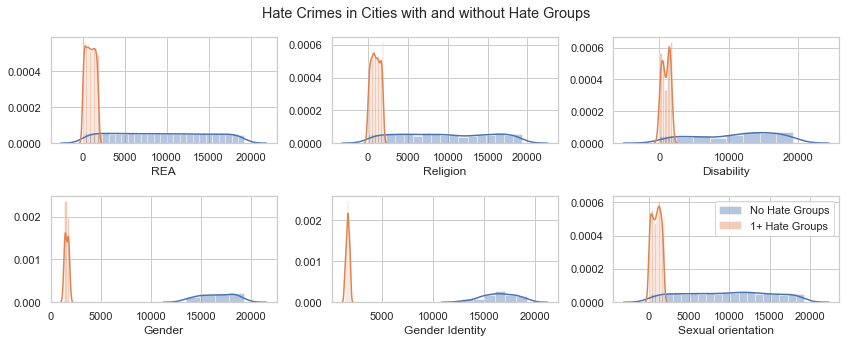

In [76]:
g = plt.figure(figsize=(12,5))
 
for i, col in enumerate(['REA', 'Religion', 'Disability',
       'Gender', 'Gender Identity', 'Sexual orientation']):
    
    plt.subplot(2,3,i+1)
    sns.distplot(no_hate_groups[col].nonzero(), label="No Hate Groups")
    sns.distplot(one_plus_hg[col].nonzero(), label="1+ Hate Groups")
    plt.xlabel(col)
    
plt.legend()
plt.suptitle('Hate Crimes in Cities with and without Hate Groups')
plt.tight_layout(w_pad=.5, rect=[0, 0.03, 1, 0.95])
plt.show()
    

In [77]:
no = by_city_only.groupby('Hate Type Count')['REA', 'Religion', 'Disability',
       'Gender', 'Gender Identity', 'Sexual orientation']

data_agg = no.agg(['mean'])

In [78]:
data_agg = data_agg.transpose()
data_agg

,Hate Type Count,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
REA,mean,1.630569,3.542265,7.449045,12.864706,16.261905,20.851064,25.047619,38.5,50.666667,74.0
Religion,mean,0.483014,0.799841,1.754777,3.217647,5.095238,20.361702,24.571429,80.0,109.000000,183.0
Disability,mean,0.035164,0.067783,0.098726,0.123529,0.119048,0.106383,0.095238,1.0,0.333333,1.0
Gender,mean,0.004616,0.002392,0.012739,0.041176,0.011905,0.000000,0.047619,0.0,0.000000,5.0
Gender Identity,mean,0.010269,0.023126,0.047771,0.135294,0.297619,0.148936,1.857143,0.5,4.000000,19.0
Sexual orientation,mean,0.399824,1.097289,3.242038,5.452941,8.547619,14.957447,18.333333,55.5,62.000000,79.0


The above table shows the number of different hate types that have at least 1 hate group in the city as columns, with the average number of hate crimes in each bias category for those same cities.

It appears that overarchingly, as the number of hate types present increases, the number of crimes by each bias increases overall. This isn't taking into consideration whether or not the hate type represented in that city is the same as the bias category targeted in each hate crime, and it also is looking at the overall numbers, meaning that it is considering hate groups in any year and hate crimes in any year.
